## 分类的进一步探讨——算法评估及kNN
### 训练集和测试集
通常，我们把每个数据集分成两个子集，一个用于构建分类器，该数据集称为训练集（training set）。另一个数据集用于评估分类器，该数据集称为测试集（test set）。训练集和测试集是数据挖掘中的常用术语。

### 10折交叉验证
使用这种方法，我们将数据集随机分成10份，使用其中9份进行训练而将另外1份用作测试。该过程可以重复10次，每次使用的测试数据不同。

#### 留一法（Leave-One-Out）
在机器学习领域，n折交叉验证（n是数据集中样本的数目）被称为留一法。我们已经提到，留一法的一个优点是每次迭代中都使用了最大可能数目的样本来训练。另一个优点是该方法具有确定性。

**留一法的缺点**
留一法的主要不足在于计算的开销很大。考虑一个包含1000个实例的中等规模的数据集，需要一分钟来训练分类器。对于10折交叉验证来说，我们将花费10分钟用于训练。而对于留一法来说，训练时间需要16个小时。

留一法的另一个缺点与分层采样（stratification）有关。

#### 分层采样（Stratification）
回到上一章的例子，即构建分类器来确定女运动员所从事的体育项目（篮球、体操或田径）。当训练分类器时，我们希望训练数据能够具有代表性，并且包含所有3类的数据。

### 混淆矩阵
到目前为止，通过计算下列精确率百分比，我们对分类器进行评估：
$\frac{正确分类的测试样本数目}{总测试样本数目}$

混淆矩阵是一种能够详细揭示分类器性能的可视化方法。混淆矩阵的行代表测试样本的真实类别，而列代表分类器所预测出的类别。

假设我们有一个由100名女子体操运动员、100名WNBA篮球运动员及100名女子马拉松运动员的属性构成的数据集。我们利用10折交叉验证法对分类器进行评估。测试的结果可能如下面的混淆矩阵所示：
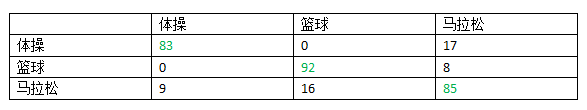

混淆矩阵的对角线给出了正确分类的实例数目：
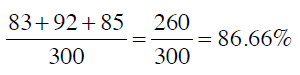

从混淆矩阵中可以看出分类器的主要问题。在这个示例中，我们的分类器可以很好地区分体操运动员和篮球运动员，而马拉松运动员则比较容易和其他两个类别发生混淆。

### 一个编程的例子
参考：chap05/crossValidation.py

最终执行结果如下：
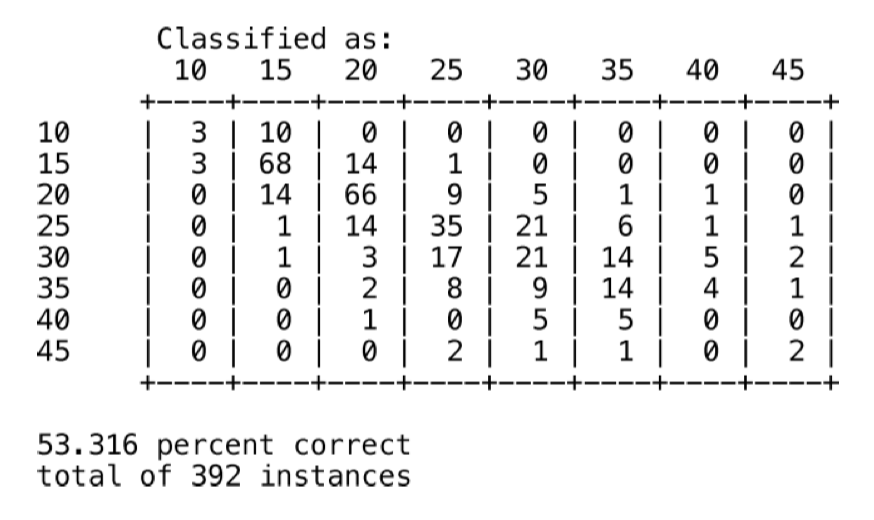

### Kappa 统计量
上例中，10折分类器预测汽车MPG的精确率为53.316%。但是，53.316%意味着分类器到底是好还是坏？为回答这个问题，我们将继续考察一个统计量，即Kappa统计量。

Kappa指标可以用来评价分类器的效果比随机分类要好多少。我们仍用运动员的例子来说明，以下是它的混淆矩阵：
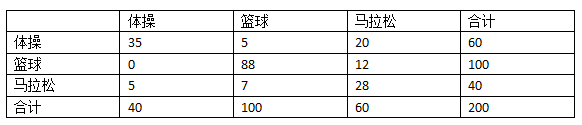

在计算正确率时，我们只需将对角线相加（35 + 88 + 28 = 151）除以合计（200）就可以了，结果是0.755。

随机分类器会将其中的20%（20人）分为体操运动员，50%分为篮球运动员，30%分为马拉松运动员：
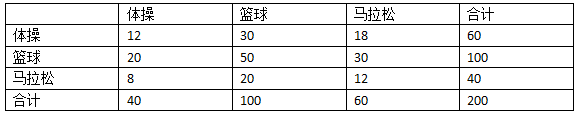

从而得到随机分类器的准确率是0.37。Kappa指标计算公式为：
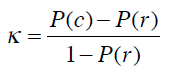

其中，P(c)是实际分类器的精确率，而P(r)是随机分类器的精确率。本例中实际分类器的精确率为0.755，而随机分类器的精确率为0.37，因此有：
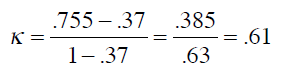

0.61要如何解释呢？可以参考下列经验结果：
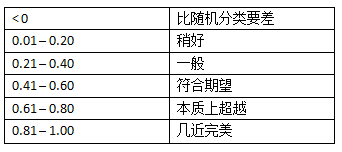



### kNN
最近邻分类器的一种改进方法是考察k个而不只是1个最近的邻居（kNN）。每个邻居会进行投票，分类器会将实例分到具有最高投票数目的类别中去。

举个例子，我们需要预测Ben对Funky Meters的喜好程度，他的三个近邻分别是Sally、Tara、和Jade。下表是这三个人离Ben的距离，以及他们对Funky Meters的评分：
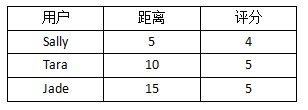

可以看到，Sally离Ben最近，她给Funky Meters的评分是4。在计算平均值的时候，我希望距离越近的用户影响越大，因此可以先对距离取倒数，从而得到下表：
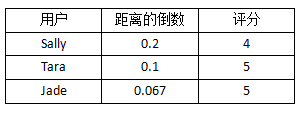

之后把所有的距离倒数除以距离倒数的和（0.2 + 0.1 + 0.067 = 0.367），从而得到评分的权重：
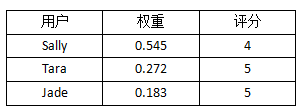

最后计算得分：
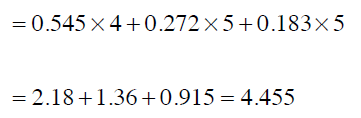

### 一个最终版的kNN分类器
